<a href="https://colab.research.google.com/github/contatofe/Estudos-e-Desafios/blob/main/Desafio_5_Clusteriza%C3%A7%C3%A3o_Udemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importações

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift

#Analisando o Dataframe


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Arquivos - Dados/wine-clustering.csv')

In [ ]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
#Todos os campos estão preenchidos (sem dados nulos) e em seu Tipo correto.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


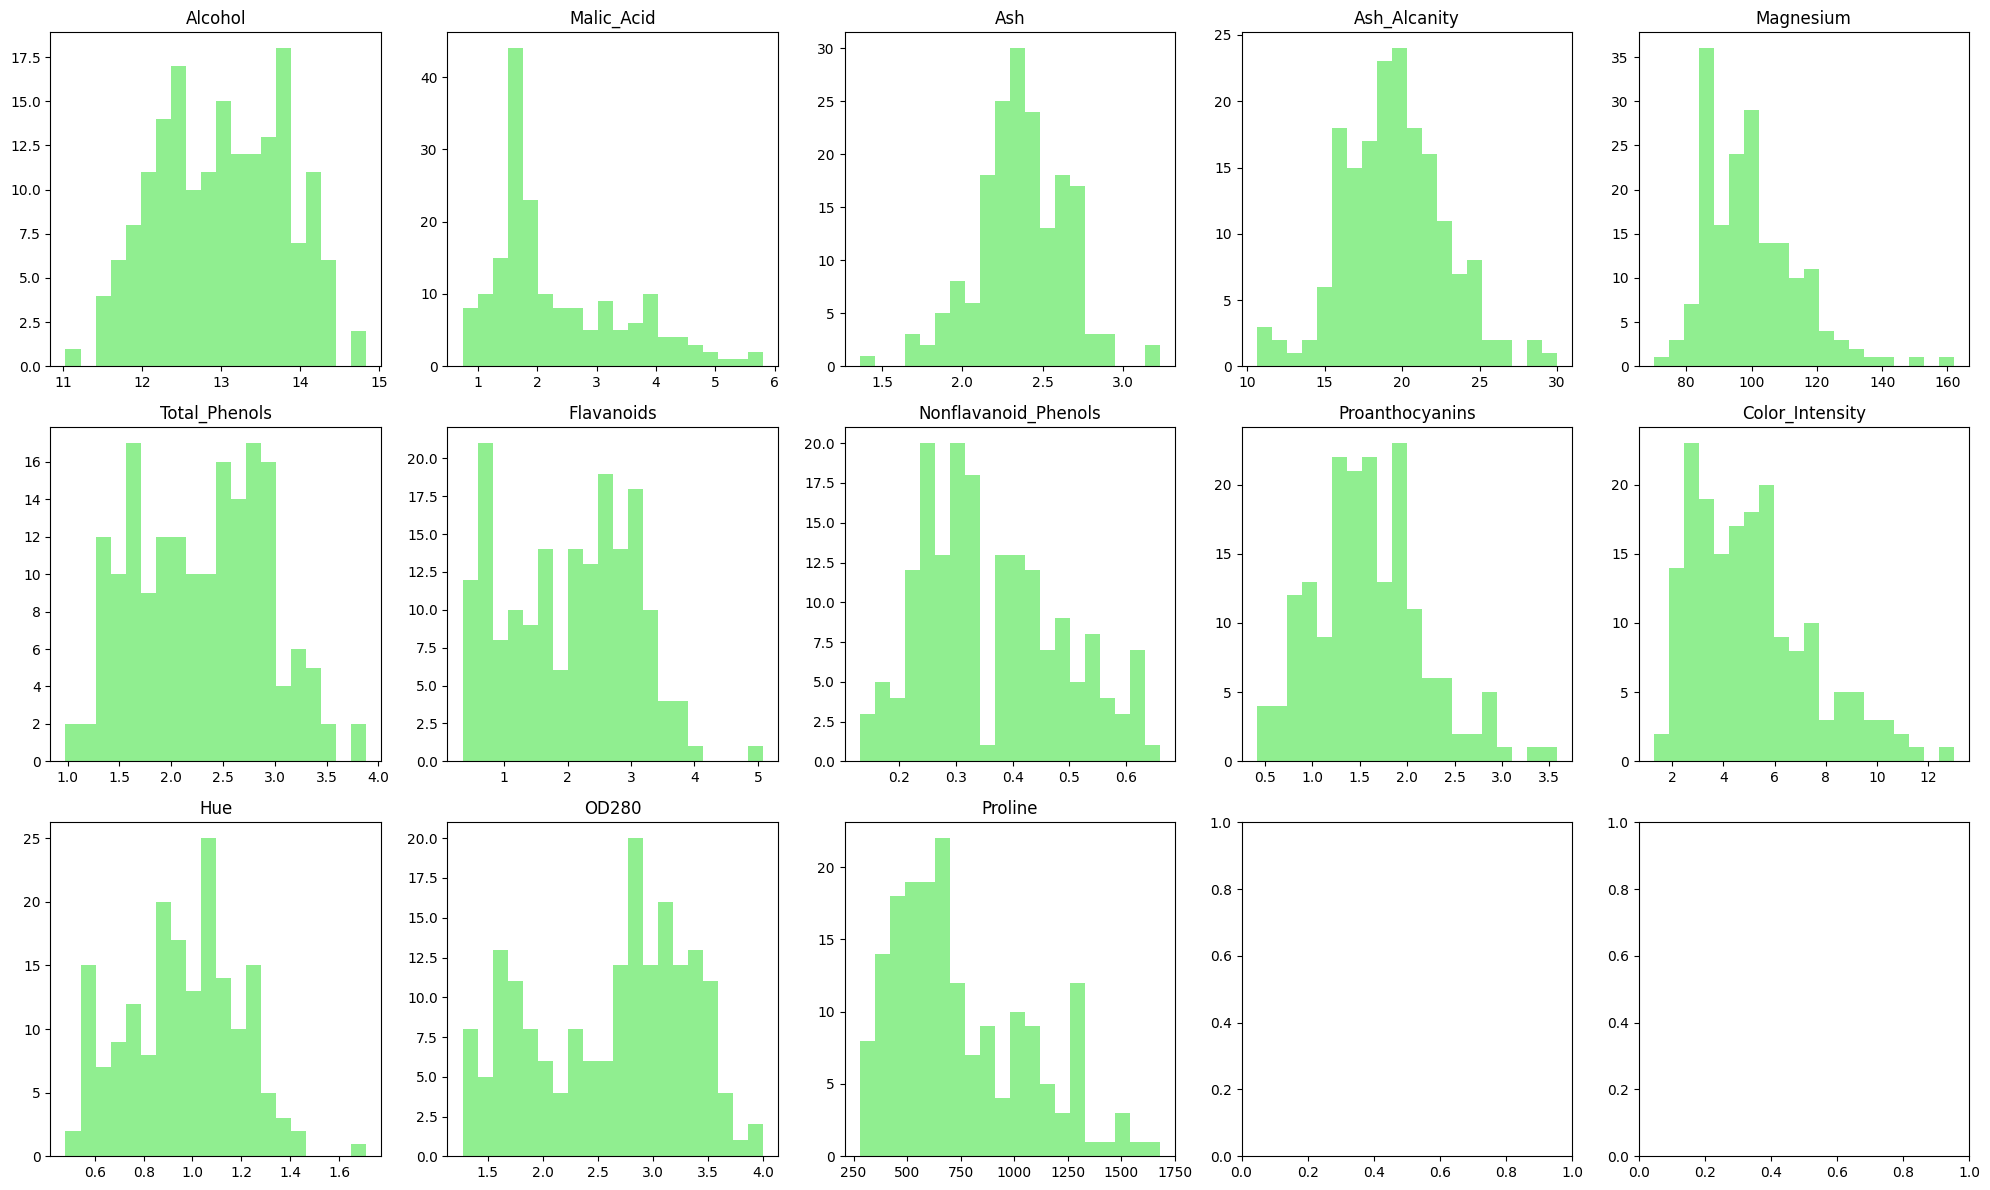

In [ ]:
#Visualizando os histogramas de cada coluna

num_columns = 5
num_rows = -(-len(df.columns) // num_columns)

fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 4 * num_rows))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    ax = axes[i]
    ax.hist(df[column], bins=20, color='lightgreen')
    ax.set_title(column)

plt.tight_layout()
plt.show()

##Pré Processamento

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

#Criando modelos

##K-Means

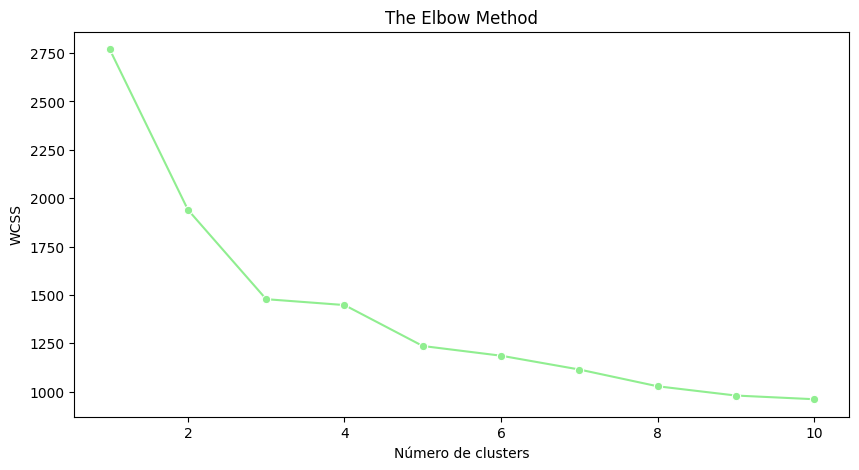

In [ ]:
#Gerando o gráfico do método cotovelo (elbow method). Ao observar o gráfico, podemos ver que os números 3 e 4 parecem ser uma quantidade adequada de clusters para o modelo.

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(df_scaled)
# Método inertia para gerar o wcss
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='lightgreen')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300)
clusters = kmeans.fit(df_scaled)
df_scaled['K-Means'] = clusters.labels_

In [ ]:
# Proporção de grupos
df_scaled['K-Means'].value_counts()

,count
K-Means,
3,56
2,53
1,50
0,19


##Agrupamento hierárquico

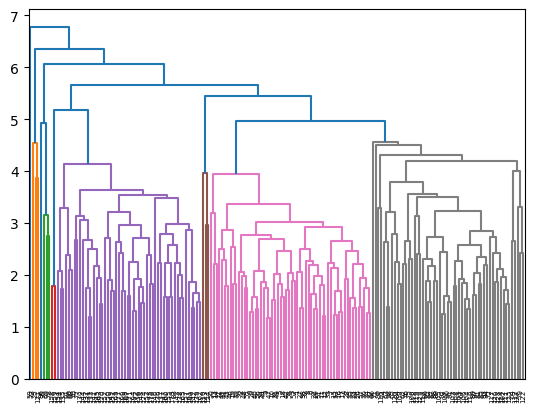

In [ ]:
dendrograma = dendrogram(linkage(df_scaled.drop('K-Means', axis=1), method = 'average'))

In [ ]:
ac = AgglomerativeClustering(n_clusters=4, linkage = 'ward')
agg_clustering = ac.fit_predict(df_scaled)
df_scaled['Agglomerative Clustering'] = agg_clustering

In [ ]:
df_scaled['Agglomerative Clustering'].replace({0: 1, 1: 3, 2: 2, 3: 0}, inplace = True)

In [ ]:
df_scaled.loc[:, ['K-Means', 'Agglomerative Clustering']]

,K-Means,Agglomerative Clustering
0,3,3
1,3,3
2,3,3
3,3,3
4,0,0
...,...,...
173,1,1
174,1,1
175,1,1
176,1,1


In [ ]:
# O algoritmo Agglomerative Clustering só parece divergir do K-means em 12 linhas do nosso dataframe.
(df_scaled['K-Means'] != df_scaled['Agglomerative Clustering']).sum()


12

In [ ]:
# Proporção de grupos
df_scaled['Agglomerative Clustering'].value_counts()

,count
Agglomerative Clustering,
3,59
1,56
2,43
0,20


##DBScan

In [ ]:
dbscan = DBSCAN(eps= 2.9, min_samples=5, algorithm = 'ball_tree')
dbscan.fit(df_scaled)
df_scaled['DBScan'] = dbscan.labels_

In [ ]:
# O algoritmo DBScan separou em 3 grupos com 32 pontos ruidosos fora dos grupos.
df_scaled['DBScan'].value_counts()

,count
DBScan,
0,98
1,43
-1,32
2,5


##Meanshift

In [ ]:
mean = MeanShift(bandwidth=3.9, cluster_all=True)
mean.fit(df_scaled)
df_scaled['MeanShift'] = mean.labels_

In [ ]:
# Proporção de grupos. Mesmo alterando os hiperparâmetros, os dados parecem exibir alguns grupos com poucos dados, como os grupos 5 e 6.
df_scaled['MeanShift'].value_counts()

,count
MeanShift,
0,96
1,68
3,5
4,4
2,3
5,1
6,1


##Resultados

In [ ]:
#Visualização dos grupos por algoritmo.
df_scaled.loc[:, ['K-Means', 'Agglomerative Clustering', 'DBScan', 'MeanShift']]

,K-Means,Agglomerative Clustering,DBScan,MeanShift
0,3,3,0,0
1,3,3,0,0
2,3,3,0,0
3,3,3,0,0
4,0,0,-1,4
...,...,...,...,...
173,1,1,1,1
174,1,1,1,1
175,1,1,1,1
176,1,1,1,1
